In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

production_values = []
production_values_strings = []
i = 10
while i <= 210:
    production_values.append(i)
    production_values_strings.append(str(i))
    i += 10

tables = []
for p in production_values:
    filename = 'max_production_'+ str(p) + '_2' + '.csv'
    tables.append(pd.read_csv(filename, skiprows=6))

all_data = pd.concat(tables)

Index(['[run number]', 'use-land?', 'max-productive-capacity',
       'layoff-probability', 'n-firms', 'index-in-use', 'firm-competency',
       'transactions-per-month', 'n-households', 'setup-structure',
       'mean-new-agreements-per-month', 'fix-n-framework-agreements?',
       'firm-memory-constant', 'framework-duration', '[step]',
       'unemployment-rate', 'mean-price-all-firms',
       'mean-consumer-demand-not-satisfied', 'total-sales',
       'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',
       'turnover-rate', 'bankrupt-firms', 'household-wealth-concentration',
       'mean-age', 'mean-inventories'],
      dtype='object')


In [3]:
def plot(x, y, ylabels, x_axis_title, y_axis_title, plot_title, filename, fig):
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    plt.figure(fig)
    plt.xlabel(x_axis_title)
    plt.ylabel(y_axis_title)
    plt.title(plot_title)
    plt.grid()

    index = 0
    for y in y:
        plt.plot(x, y, label=ylabels[index], color=colors.pop())
        index += 1
    plt.legend()
    plt.savefig(filename)


In [4]:
def get_means(data, variable, capacities):
    means = []

    for c in capacities:
        run_data = data[data['max-productive-capacity'] == c]
        last_1500 = run_data[run_data['[step]'] >= 1500]
        means.append(last_1500[variable].mean())

    return means

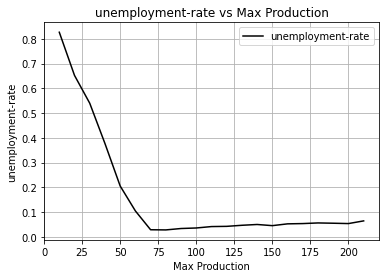

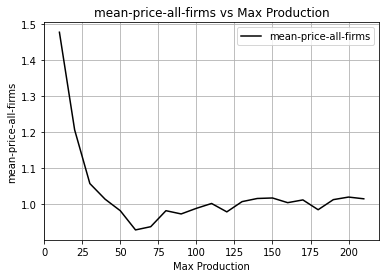

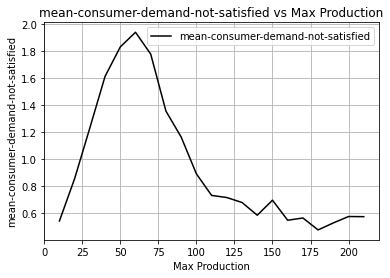

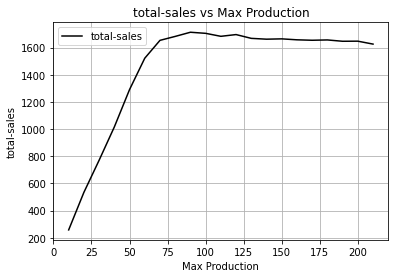

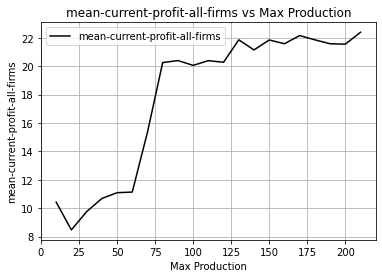

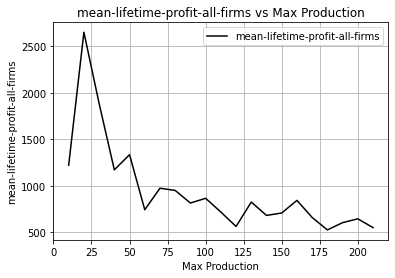

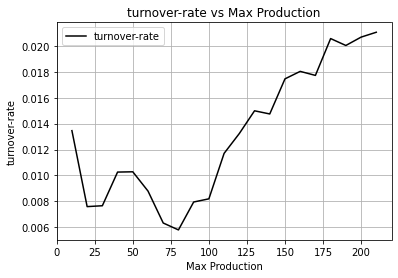

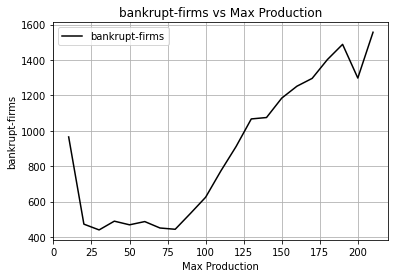

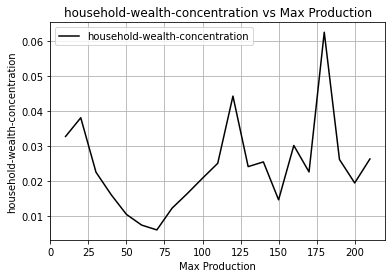

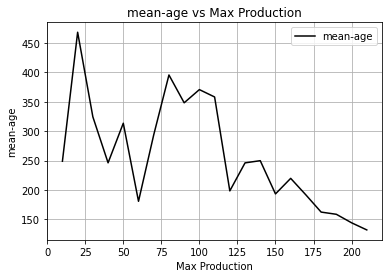

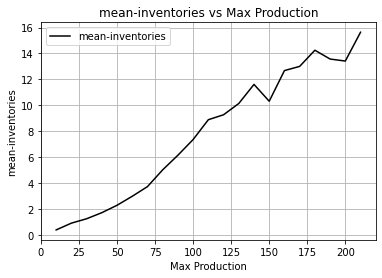

In [5]:
variables = ['unemployment-rate', 'mean-price-all-firms',
       'mean-consumer-demand-not-satisfied', 'total-sales',
       'mean-current-profit-all-firms', 'mean-lifetime-profit-all-firms',
       'turnover-rate', 'bankrupt-firms', 'household-wealth-concentration',
       'mean-age', 'mean-inventories']
fig = 0
for v in variables:
    means = get_means(all_data, v, production_values)
    filename = 'average_'+ v + '_run_2' + '.png'
    plot(production_values, [means], [v], 'Max Production', v,
         v + " vs Max Production", filename, fig)
    fig += 1

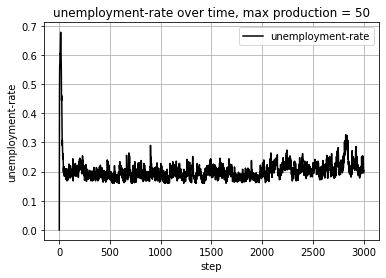

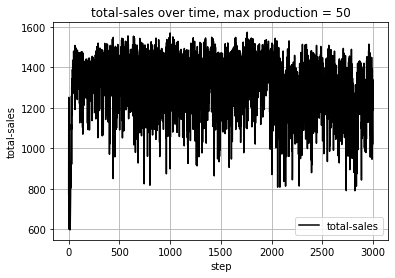

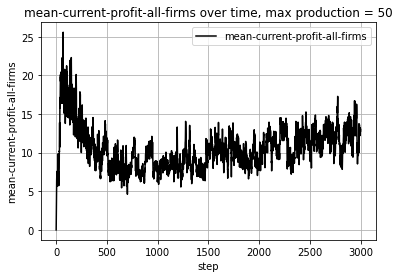

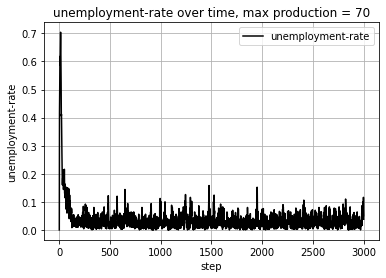

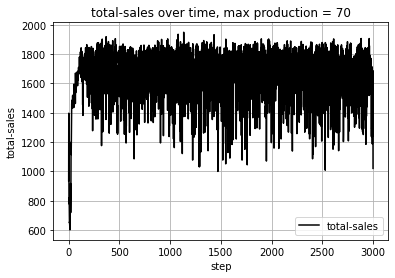

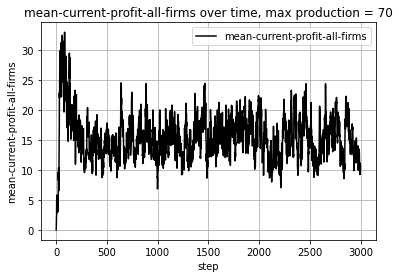

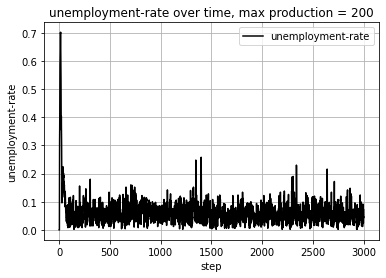

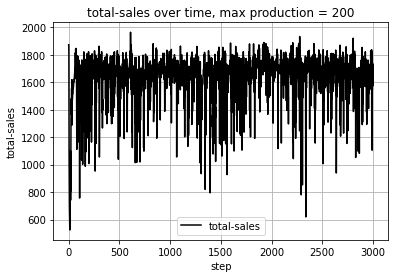

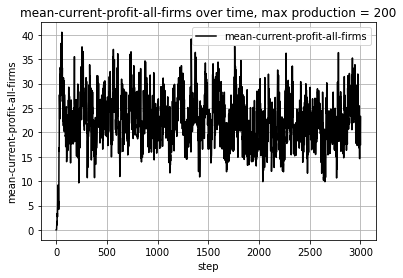

In [8]:
# code for time series

variables = ['unemployment-rate', 'total-sales', 'mean-current-profit-all-firms']
production_values = [50, 70, 200]

for p in production_values:
    for v in variables:
        filename = v + '_time_series_' + str(p) + '.png'
        y = all_data[all_data['max-productive-capacity'] == p][v]
        x = np.arange(len(y))
        plot(x, [y], [v], 'step', v, v + ' over time, max production = ' + str(p), filename, fig)
        fig += 1

